In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
clean_q = pd.read_csv('cleaned_q.csv')
clean_q=clean_q.rename(columns={'Unnamed: 0':'date_q'})
clean_q=clean_q.set_index(clean_q['date_q'])

<AxesSubplot:xlabel='date_q'>

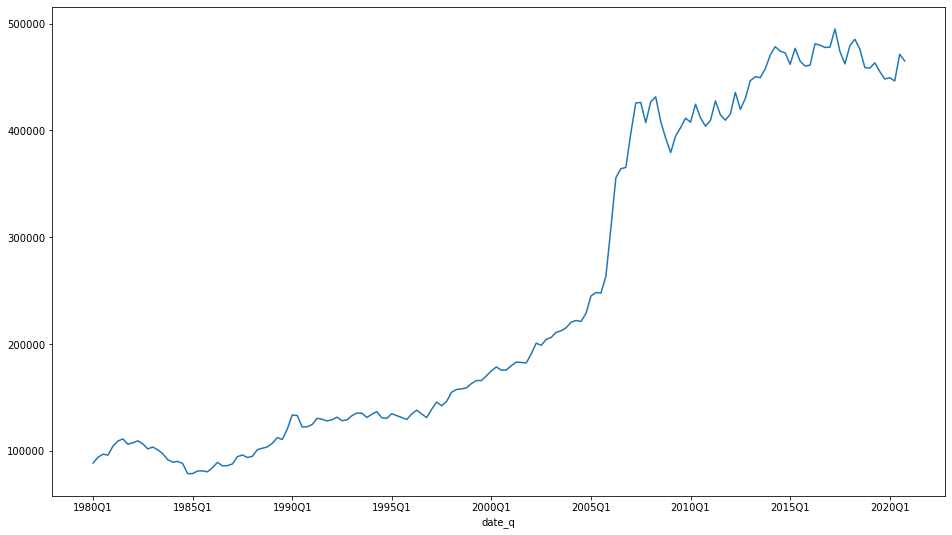

In [4]:
prices = clean_q['avg_price']
prices.plot(figsize=(16,9))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

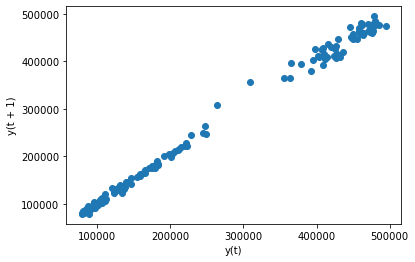

In [5]:
pd.plotting.lag_plot(prices)

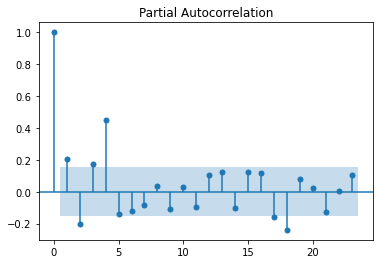

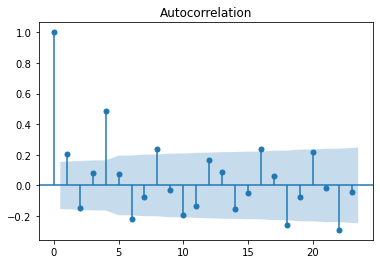

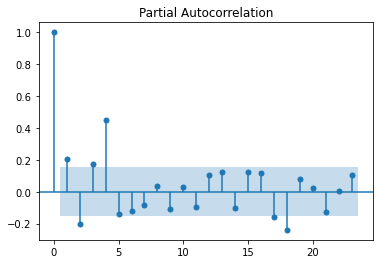

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
prices_diff= prices.diff()
prices_diff = prices_diff.dropna()
plot_acf(prices_diff)
plot_pacf(prices_diff)

In [9]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Results of Dickey-Fuller')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic', 'p-val', '# lags', 'N'])
    for key, val in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = val
    print(dfoutput)

In [11]:
adf_test(prices_diff)

Results of Dickey-Fuller
Test statistic           -3.916176
p-val                     0.001919
# lags                    4.000000
N                       158.000000
Critical Value (1%)      -3.472431
Critical Value (5%)      -2.880013
Critical Value (10%)     -2.576619
dtype: float64


In [21]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(prices_diff,order=(2,0,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  163
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1724.976
Date:                Mon, 15 Feb 2021   AIC                           3459.952
Time:                        22:25:25   BIC                           3475.421
Sample:                    04-01-1980   HQIC                          3466.232
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2309.7852    965.999      2.391      0.017     416.462    4203.109
ar.L1         -0.7261      0.172     -4.228      0.000      -1.063      -0.390
ar.L2          0.2150      0.046      4.721      0.0

<AxesSubplot:xlabel='date_q'>

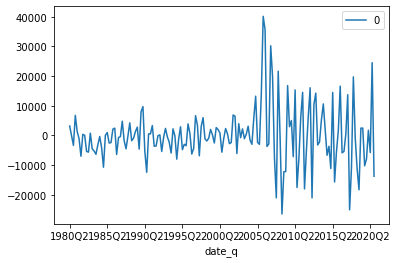

In [22]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [23]:
log_prices = np.log(prices)
log_diff = log_prices.diff()
log_diff = log_diff.dropna()

<AxesSubplot:xlabel='date_q'>

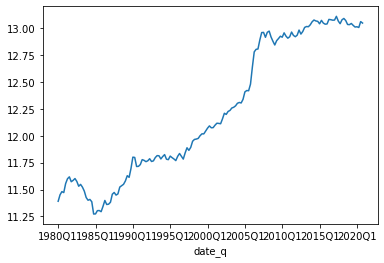

In [24]:
log_prices.plot()

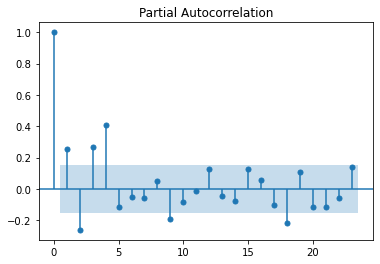

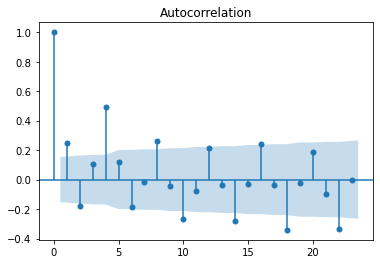

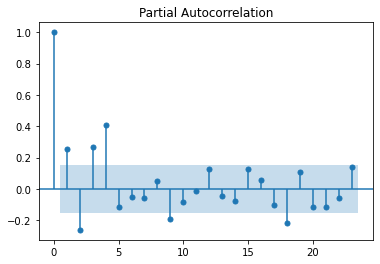

In [65]:
plot_acf(log_diff)
plot_pacf(log_diff)

In [70]:
model = ARIMA(log_prices,order=(4,1,1))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  164
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 341.011
Date:                Tue, 16 Feb 2021   AIC                           -670.022
Time:                        00:18:40   BIC                           -651.459
Sa

<AxesSubplot:xlabel='date_q'>

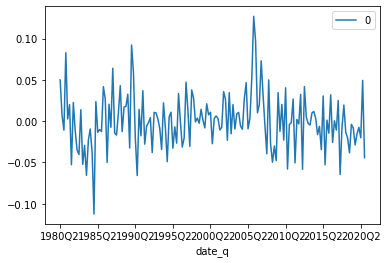

In [26]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [32]:
model = ARIMA(log_prices,order=(3,1,2))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  164
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 335.523
Date:                Mon, 15 Feb 2021   AIC                           -659.046
Time:                        23:06:17   BIC                           -640.484
Sa

In [33]:
import math
from sklearn.metrics import mean_squared_error

val = log_prices.values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(3,1,2))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

predicted=13.070831, expected=13.065986
predicted=13.079205, expected=13.042993
predicted=13.031899, expected=13.075045
predicted=13.089477, expected=13.049668
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=13.020579, expected=13.039484
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=13.046561, expected=13.041377
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=13.045444, expected=13.083835
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

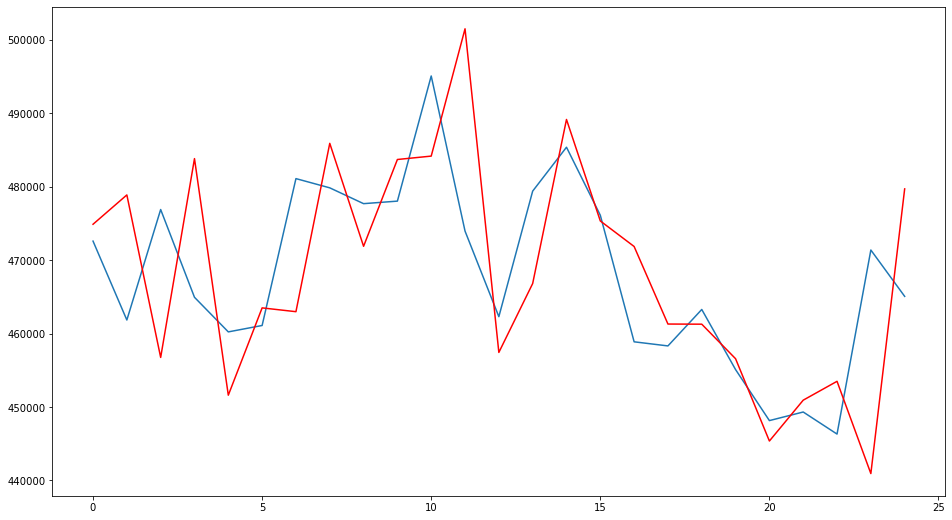

In [35]:
plt.figure(figsize=(16,9))
plt.plot(np.exp(test),label='test')
plt.plot(np.exp(predictions),label='predict',color='red')

In [77]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'mean error':me, 'mae': mae, 
            'mean percentage error': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

## SARIMAX

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
prov_fcast = pd.read_csv('prov_forecasts.csv')
nat_fcast = pd.read_csv('nat_forecast.csv')
prov_fcast=prov_fcast.set_index('Unnamed: 0')
nat_fcast=nat_fcast.set_index('date')


In [38]:
nat_exog = nat_fcast[['Interest rate on fixed 5-year mortgages [%]','World Price Oil (West Texas Intermediate)']]
nat_exog=nat_exog.rename(columns={
    'Interest rate on fixed 5-year mortgages [%]':'morg_rate',
    'World Price Oil (West Texas Intermediate)':'wti'
})
nat_exog=nat_exog[:'2024']
comm_fcast =pd.read_csv('comm_fore.csv')
nat_exog.wti[164:] = comm_fcast[116:].WTI

In [39]:
nat_exog.index = pd.period_range(start='1980',end='2023-12',freq='q')

In [44]:
prov_fcast

,Alberta_Real GDP,Alberta_Real household disp. income,Alberta_CPI,Alberta_Unemployment rate,Alberta_Number of households,Alberta_Share of population aged 25-34,Alberta_Real 5-year mortgage rate
Unnamed: 0,,,,,,,
1984Q1,123554.787000,43487.392479,0.593435,10.900000,8.036833e+05,0.202737,9.197292
1984Q2,126137.482000,44638.104602,0.595181,11.600000,8.052995e+05,0.202876,12.055714
1984Q3,125411.117000,44106.463796,0.600481,11.733333,8.067957e+05,0.202639,11.631155
1984Q4,129204.614000,44773.150681,0.603223,11.400000,8.083714e+05,0.203535,10.734994
1985Q1,135372.716000,46578.003995,0.608993,10.466667,8.102094e+05,0.204120,10.332823
...,...,...,...,...,...,...,...
2023Q4,363862.101939,131206.810400,1.415650,9.347530,1.785216e+06,0.145693,-1.464258
2024Q1,369741.211128,132074.703219,1.424879,9.083781,1.794615e+06,0.145249,-1.745479
2024Q2,375038.059258,133023.757237,1.433453,8.898994,1.803920e+06,0.144720,-1.286832


<AxesSubplot:xlabel='Unnamed: 0'>

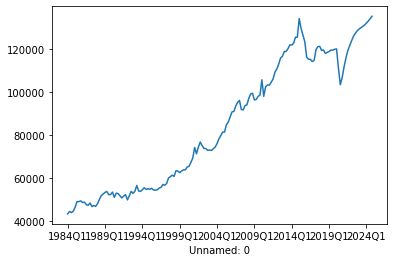

In [43]:
prov_fcast['Alberta_Real household disp. income'].plot()

<AxesSubplot:xlabel='Unnamed: 0'>

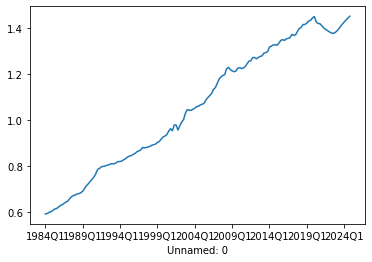

In [45]:
prov_fcast['Alberta_CPI'].plot()

<AxesSubplot:xlabel='Unnamed: 0'>

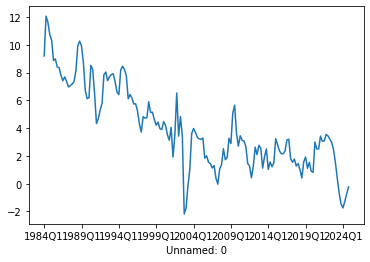

In [47]:
prov_fcast['Alberta_Real 5-year mortgage rate'].plot()

In [114]:
sales = pd.read_csv('sales_fcast.csv',index_col=0)
sales = sales.rename(columns={'0':'sales'})
sales.index = pd.period_range(start='1980',end = '2023-12', freq='q')

RMSE: 0.122
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


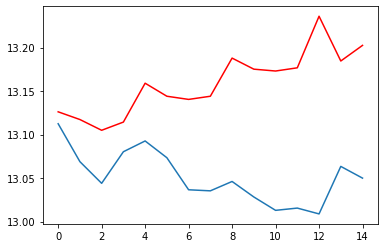

In [86]:
val = log_prices['1984Q2':].values
size = int(len(val)*0.9)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = sales['1984':'2021'].diff().dropna().values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,1), seasonal_order=(1,1,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [84]:
forecast_accuracy(output.summary_frame()['mean'],test)

{'mape': 0.009120963982864385,
 'mean error': -0.11909274668331533,
 'mae': 0.11909274668331533,
 'mean percentage error': -0.009120963982864385,
 'rmse': 0.1284292067615822,
 'corr': 0.4305729479717249,
 'minmax': 0.009120963982864216}

In [85]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  124
Model:             SARIMAX(3, 1, 1)x(1, 1, [], 4)   Log Likelihood                 238.454
Date:                            Tue, 16 Feb 2021   AIC                           -462.907
Time:                                    00:28:21   BIC                           -443.453
Sample:                                         0   HQIC                          -455.007
                                            - 124                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -7.315e-06   2.15e-06     -3.400      0.001   -1.15e-05    -3.1e-06
ar.L1          0.1863      4.499      0.041      0.967      -8.632       9.005
ar.L2         -0.0085      1.645     -0.005      0.996      -3.232       3.215
ar.L3         -0.1036      0.360     -0.288      0.773      -0.809       0.601
ma.L1          0.1782      4.476      0.040      0.968      -8.595       8.951
ar.S.L4       -0.2477      0.411     -0.603      0.547      -1.053       0.558
sigma2         0.0011      0.000      7.799      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 5.30
Prob(Q):                              0.70   Prob(JB):                         0.07
Heteroskedasticity (H):               1.13   Skew:                             0.25
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE: 0.112
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


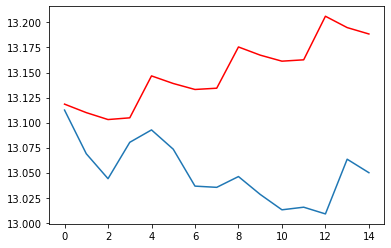

In [226]:
val = log_prices['1984':].values
size = int(len(val)*0.9)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = sales['1984':'2020'].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,1), seasonal_order=(1,1,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [105]:
prov_fcast.index = pd.period_range(start='1984',end = '2024-12',freq='q')

In [110]:
exog_var = nat_exog['1984':]
exog_var=exog_var.join(prov_fcast)

In [122]:
exog_var = exog_var.join(sales['1984':])

RMSE: 0.033
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


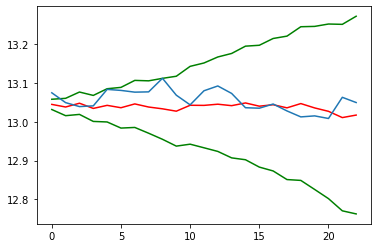

In [164]:
val = log_prices['1984':].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = exog_var[['wti','Alberta_CPI','Alberta_Real 5-year mortgage rate','sales']][:'2020'].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,1), seasonal_order=(1,1,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
out_fcast = output.summary_frame(alpha=0.7)

plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'],color='green')
plt.plot(out_fcast['mean_ci_upper'],color='green')

plt.plot(test)

In [157]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  125
Model:             SARIMAX(2, 1, 1)x(1, 1, [], 4)   Log Likelihood                 236.181
Date:                            Tue, 16 Feb 2021   AIC                           -454.362
Time:                                    07:24:52   BIC                           -429.274
Sample:                                         0   HQIC                          -444.174
                                            - 125                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003      0.000      0.776      0.438      -0.000       0.001
x2             0.5373      0.674      0.798      0.425      -0.783       1.858
x3             0.0027      0.003      0.870      0.384      -0.003       0.009
x4         -1.549e-06   3.51e-06     -0.441      0.659   -8.44e-06    5.34e-06
ar.L1          0.6673      0.784      0.851      0.395      -0.870       2.204
ar.L2         -0.2405      0.249     -0.964      0.335      -0.729       0.248
ma.L1         -0.3023      0.816     -0.370      0.711      -1.902       1.297
ar.S.L4       -0.2422      0.142     -1.710      0.087      -0.520       0.035
sigma2         0.0012      0.000      7.347      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.63   Prob(JB):                         0.25
Heteroskedasticity (H):               1.11   Skew:                             0.15
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

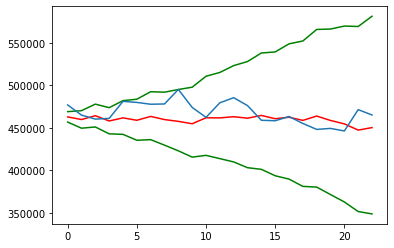

In [165]:
out_fcast = np.exp(output.summary_frame(alpha=0.7))

plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'],color='green')
plt.plot(out_fcast['mean_ci_upper'],color='green')

plt.plot(np.exp(test))

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


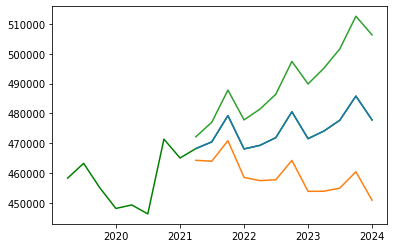

In [269]:
val = log_prices['1984':].values

variables = ['wti','Alberta_CPI','Alberta_Real 5-year mortgage rate','sales']

exog = exog_var[variables][:'2020'].values
exog_fcast = exog_var[variables][160-12:160]

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.8)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = log_prices['2019':]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2019',end='2024',freq='q')

plt.plot(np.exp(history),color='green')
plt.plot(np.exp(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':]))

In [270]:
np.exp(fcast_res['mean']['2021'].mean())/np.exp(history['2020'].mean())

1.0296737991997638

In [273]:
np.exp(fcast_res).to_csv('price_fcast_1.csv')

In [167]:
exog_var_diff = exog_var.diff().dropna()

RMSE: 0.030
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


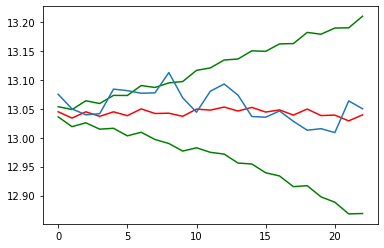

In [280]:
val = log_prices['1984':].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = exog_var[['wti','sales','Alberta_Real 5-year mortgage rate']][:'2020'].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,1), seasonal_order=(1,1,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
out_fcast = output.summary_frame(alpha=0.8)

plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'],color='green')
plt.plot(out_fcast['mean_ci_upper'],color='green')

plt.plot(test)

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


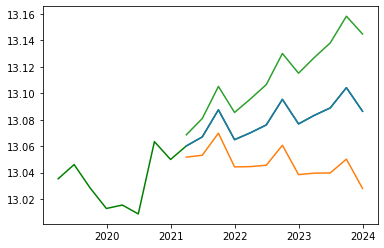

In [274]:
val = log_prices['1984':].values

variables = ['wti','sales','Alberta_Real 5-year mortgage rate']

exog = exog_var[variables][:'2020'].values
exog_fcast = exog_var[variables][160-12:160]

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.8)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = log_prices['2019':]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2019',end='2024',freq='q')

plt.plot(history,color='green')
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':])

In [250]:
fcast_res['mean']

2021-03-31    13.060154
2021-06-30    13.067007
2021-09-30    13.087486
2021-12-31    13.064904
2022-03-31    13.070081
2022-06-30    13.076045
2022-09-30    13.095364
2022-12-31    13.076814
2023-03-31    13.083304
2023-06-30    13.088909
2023-09-30    13.104197
2023-12-31    13.086407
Freq: Q-DEC, Name: mean, dtype: float64

In [251]:
np.exp(fcast_res['mean']['2021'].mean())/np.exp(history['2020'].mean())

1.036115056184344

In [275]:
np.exp(fcast_res).to_csv('price_fcast_2.csv')

In [236]:
out=prices.append(np.exp(fcast_res['mean']))
out.index = pd.period_range(start='1980',end='2023-12',freq='q')
out.to_csv('prices_fcast.csv')

RMSE: 0.029
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


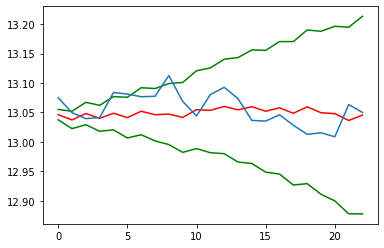

In [241]:
val = log_prices['1984':].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = exog_var[['wti','Alberta_CPI','sales']][:'2020'].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,1), seasonal_order=(1,1,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
out_fcast = output.summary_frame(alpha=0.8)

plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'],color='green')
plt.plot(out_fcast['mean_ci_upper'],color='green')

plt.plot(test)

In [187]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  125
Model:             SARIMAX(3, 1, 1)x(1, 1, [], 4)   Log Likelihood                 235.352
Date:                            Tue, 16 Feb 2021   AIC                           -452.704
Time:                                    07:39:29   BIC                           -427.616
Sample:                                         0   HQIC                          -442.516
                                            - 125                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0004      0.000      0.961      0.337      -0.000       0.001
x2             0.1142      0.485      0.236      0.814      -0.835       1.064
x3         -2.356e-06   3.29e-06     -0.717      0.473    -8.8e-06    4.08e-06
ar.L1          0.1692     12.855      0.013      0.989     -25.026      25.365
ar.L2         -0.0598      4.552     -0.013      0.990      -8.982       8.862
ar.L3         -0.0542      1.624     -0.033      0.973      -3.238       3.129
ma.L1          0.1843     12.860      0.014      0.989     -25.022      25.390
ar.S.L4       -0.2418      0.388     -0.623      0.533      -1.002       0.519
sigma2         0.0012      0.000      7.541      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.61   Prob(JB):                         0.23
Heteroskedasticity (H):               1.13   Skew:                             0.16
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

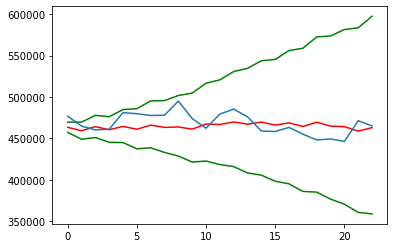

In [188]:
out_fcast = np.exp(output.summary_frame(alpha=0.7))

plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'],color='green')
plt.plot(out_fcast['mean_ci_upper'],color='green')

plt.plot(np.exp(test))

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


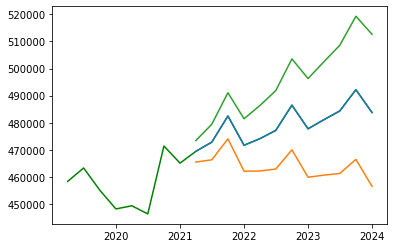

In [281]:
val = log_prices['1984':].values

variables =['wti','Alberta_CPI','sales']

exog = exog_var[variables][:'2020'].values
exog_fcast = exog_var[variables][160-12:160]

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.8)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = log_prices['2019':]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2019',end='2024',freq='q')

plt.plot(np.exp(history),color='green')
plt.plot(np.exp(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':]))

In [248]:
np.exp(fcast_res['mean']['2021'].mean())/np.exp(history['2020'].mean())

1.035295892047653

In [282]:
np.exp(fcast_res).to_csv('price_fcast_3.csv')

In [190]:
exog_var

,morg_rate,wti,Alberta_Real GDP,Alberta_Real household disp. income,Alberta_CPI,Alberta_Unemployment rate,Alberta_Number of households,Alberta_Share of population aged 25-34,Alberta_Real 5-year mortgage rate,sales
1984Q1,12.630000,30.198670,123554.787000,43487.392479,0.593435,10.900000,8.036833e+05,0.202737,9.197292,2457.000000
1984Q2,14.100000,30.368330,126137.482000,44638.104602,0.595181,11.600000,8.052995e+05,0.202876,12.055714,2323.000000
1984Q3,14.466670,29.104330,125411.117000,44106.463796,0.600481,11.733333,8.067957e+05,0.202639,11.631155,2211.000000
1984Q4,13.236670,27.430670,129204.614000,44773.150681,0.603223,11.400000,8.083714e+05,0.203535,10.734994,2190.000000
1985Q1,12.813330,27.050000,135372.716000,46578.003995,0.608993,10.466667,8.102094e+05,0.204120,10.332823,3212.000000
...,...,...,...,...,...,...,...,...,...,...
2022Q4,3.643348,53.199447,338112.201822,128427.244475,1.378260,10.256655,1.748555e+06,0.146693,2.430376,6839.628813
2023Q1,3.703923,56.015266,344952.995750,129279.509961,1.384873,9.989406,1.757159e+06,0.146431,1.487604,7004.031312
2023Q2,3.769940,57.525450,351148.261023,129880.222052,1.394002,9.810232,1.766287e+06,0.146224,0.351555,9075.329842
2023Q3,3.836403,54.093129,357387.467980,130535.732965,1.404863,9.549354,1.775714e+06,0.146002,-0.699390,8701.545126


RMSE: 0.034
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


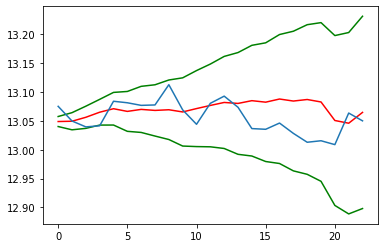

In [278]:
val = log_prices['1984':].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = exog_var[['Alberta_Real 5-year mortgage rate','Alberta_Real household disp. income','Alberta_Unemployment rate']][:'2020'].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,1), seasonal_order=(1,1,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
out_fcast = output.summary_frame(alpha=0.8)

plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'],color='green')
plt.plot(out_fcast['mean_ci_upper'],color='green')

plt.plot(test)

In [200]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  125
Model:             SARIMAX(3, 1, 1)x(1, 1, [], 4)   Log Likelihood                 236.272
Date:                            Tue, 16 Feb 2021   AIC                           -454.544
Time:                                    08:44:30   BIC                           -429.456
Sample:                                         0   HQIC                          -444.355
                                            - 125                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.002      0.373      0.709      -0.003       0.005
x2         -1.362e-06   1.74e-06     -0.785      0.433   -4.77e-06    2.04e-06
x3            -0.0047      0.006     -0.747      0.455      -0.017       0.008
ar.L1          0.1883      7.656      0.025      0.980     -14.818      15.195
ar.L2         -0.0573      2.963     -0.019      0.985      -5.865       5.751
ar.L3         -0.0822      1.031     -0.080      0.936      -2.102       1.938
ma.L1          0.1992      7.647      0.026      0.979     -14.789      15.187
ar.S.L4       -0.2489      0.412     -0.604      0.546      -1.057       0.559
sigma2         0.0012      0.000      7.994      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 4.00
Prob(Q):                              0.71   Prob(JB):                         0.14
Heteroskedasticity (H):               0.99   Skew:                             0.24
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

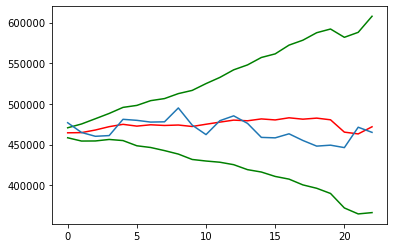

In [201]:
out_fcast = np.exp(output.summary_frame(alpha=0.7))

plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'],color='green')
plt.plot(out_fcast['mean_ci_upper'],color='green')

plt.plot(np.exp(test))

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


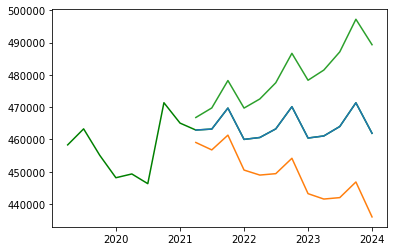

In [283]:
val = log_prices['1984':].values

variables = ['Alberta_Real 5-year mortgage rate','Alberta_Real household disp. income','Alberta_Unemployment rate']

exog = exog_var[variables][:'2020'].values
exog_fcast = exog_var[variables][160-12:160]

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.8)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = log_prices['2019':]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2019',end='2024',freq='q')

plt.plot(np.exp(history),color='green')
plt.plot(np.exp(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':]))

In [284]:
np.exp(fcast_res).to_csv('price_fcast_4.csv')

RMSE: 0.042
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


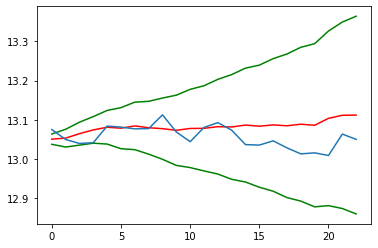

In [259]:
val = log_prices['1984':].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = exog_var[['Alberta_Real 5-year mortgage rate','Alberta_Real household disp. income']][:'2020'].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,1), seasonal_order=(1,1,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
out_fcast = output.summary_frame(alpha=0.7)

plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'],color='green')
plt.plot(out_fcast['mean_ci_upper'],color='green')

plt.plot(test)

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


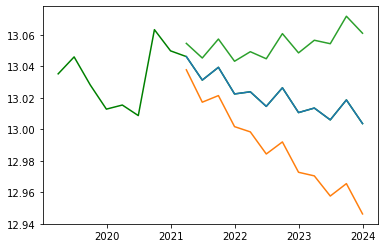

In [285]:
val = log_prices['1984':].values

exog = exog_var[['Alberta_Real 5-year mortgage rate','Alberta_Real household disp. income']][:'2020'].values
exog_fcast = exog_var[['Alberta_Real 5-year mortgage rate','Alberta_Real household disp. income']][160-12:160]

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.8)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = log_prices['2019':]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2019',end='2024',freq='q')

plt.plot(history,color='green')
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':])

In [286]:
np.exp(fcast_res).to_csv('price_fcast_5.csv')

In [202]:
exog_var

,morg_rate,wti,Alberta_Real GDP,Alberta_Real household disp. income,Alberta_CPI,Alberta_Unemployment rate,Alberta_Number of households,Alberta_Share of population aged 25-34,Alberta_Real 5-year mortgage rate,sales
1984Q1,12.630000,30.198670,123554.787000,43487.392479,0.593435,10.900000,8.036833e+05,0.202737,9.197292,2457.000000
1984Q2,14.100000,30.368330,126137.482000,44638.104602,0.595181,11.600000,8.052995e+05,0.202876,12.055714,2323.000000
1984Q3,14.466670,29.104330,125411.117000,44106.463796,0.600481,11.733333,8.067957e+05,0.202639,11.631155,2211.000000
1984Q4,13.236670,27.430670,129204.614000,44773.150681,0.603223,11.400000,8.083714e+05,0.203535,10.734994,2190.000000
1985Q1,12.813330,27.050000,135372.716000,46578.003995,0.608993,10.466667,8.102094e+05,0.204120,10.332823,3212.000000
...,...,...,...,...,...,...,...,...,...,...
2022Q4,3.643348,53.199447,338112.201822,128427.244475,1.378260,10.256655,1.748555e+06,0.146693,2.430376,6839.628813
2023Q1,3.703923,56.015266,344952.995750,129279.509961,1.384873,9.989406,1.757159e+06,0.146431,1.487604,7004.031312
2023Q2,3.769940,57.525450,351148.261023,129880.222052,1.394002,9.810232,1.766287e+06,0.146224,0.351555,9075.329842
2023Q3,3.836403,54.093129,357387.467980,130535.732965,1.404863,9.549354,1.775714e+06,0.146002,-0.699390,8701.545126


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


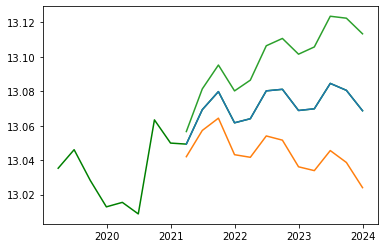

In [268]:
val = log_prices['1984':].values

variables = ['wti','sales','Alberta_Real 5-year mortgage rate']

exog = exog_var[variables][:'2020'].values
exog_fcast = exog_var[variables][160-12:160]

model = SARIMAX(val,order=(4,1,1),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.8)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = log_prices['2019':]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2019',end='2024',freq='q')

plt.plot(history,color='green')
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':])